### Analysis of transects
First we are going to analyse transects from the individuals logs whihc are generated at the end of each batch run, so technocally for each environment we only have 30 individual logs and they all refer to a point in time in the iteration which correspond to iteration =  50000


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [32]:
# define folder path
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]

folder_labels = [5 , 10, 25, 50, 100, 200]

In [38]:
#freq that to check the impact of individual colour frequency
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/50w_0RG',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/50w_RGB',]
# Define folder labels
folder_labels = [50, 50]

In [11]:
#List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over200/mh',]

folder_labels = [5, 10, 25, 50, 100, 200]


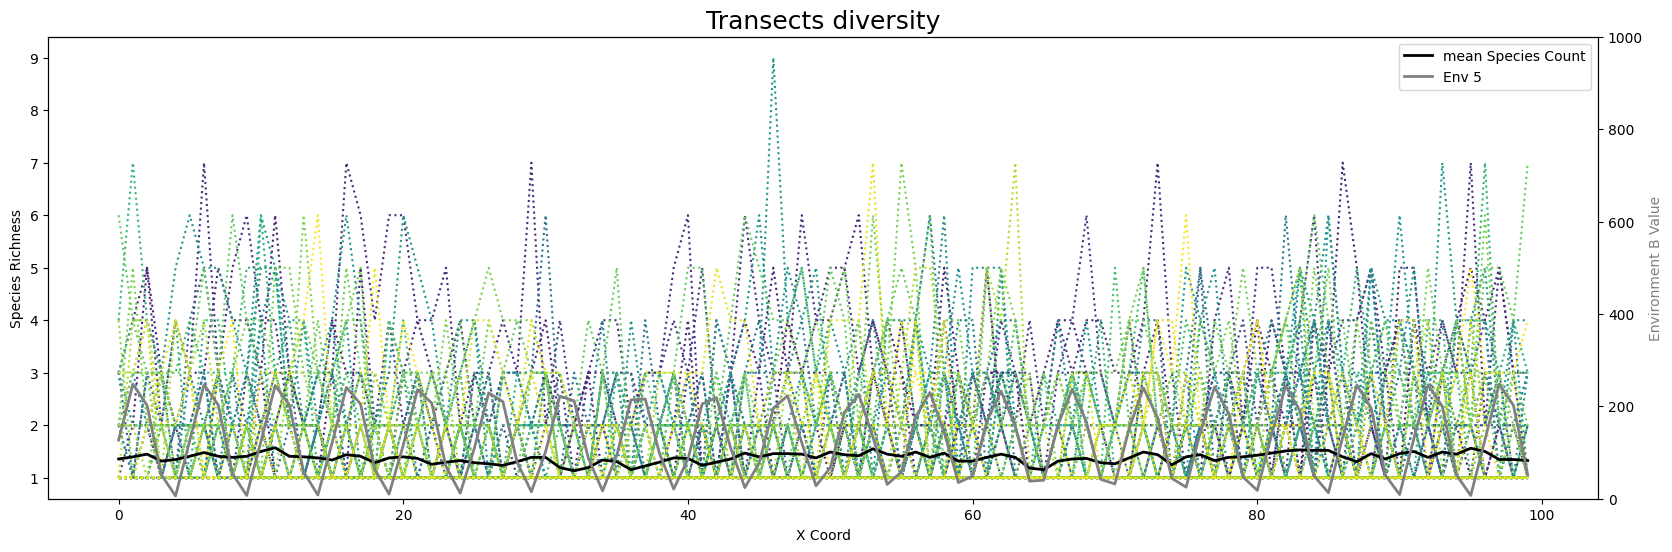

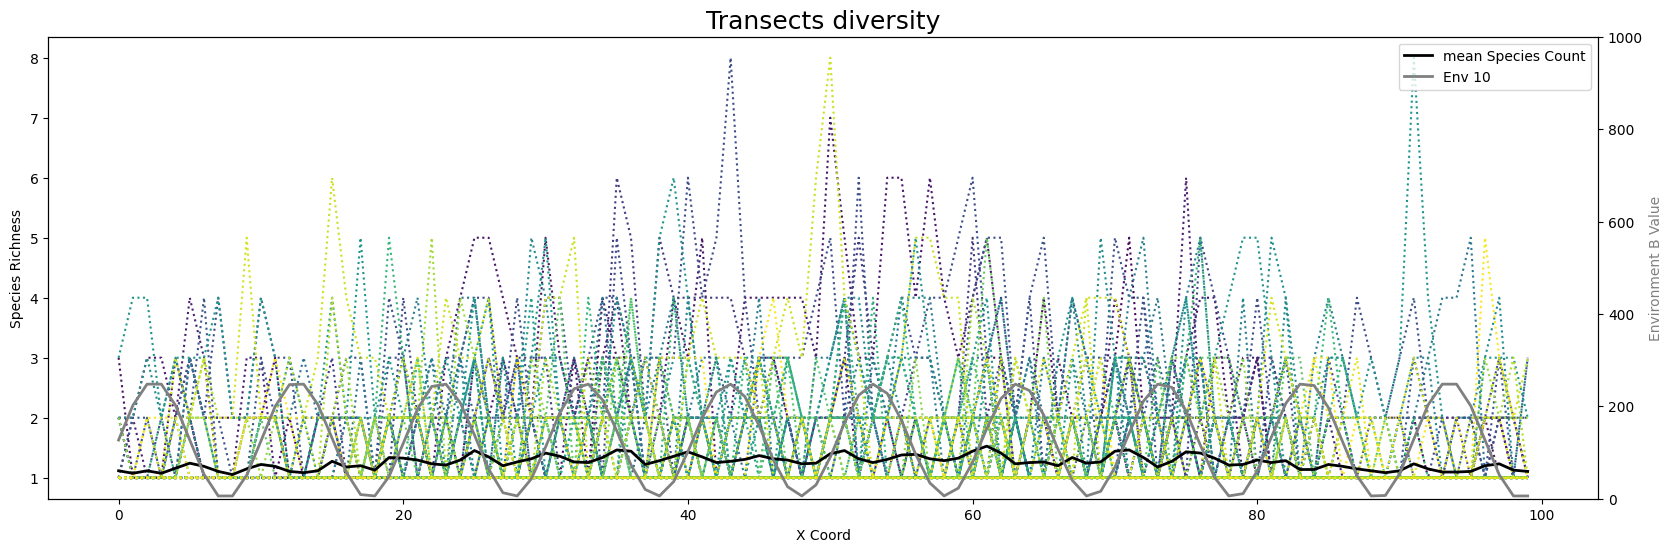

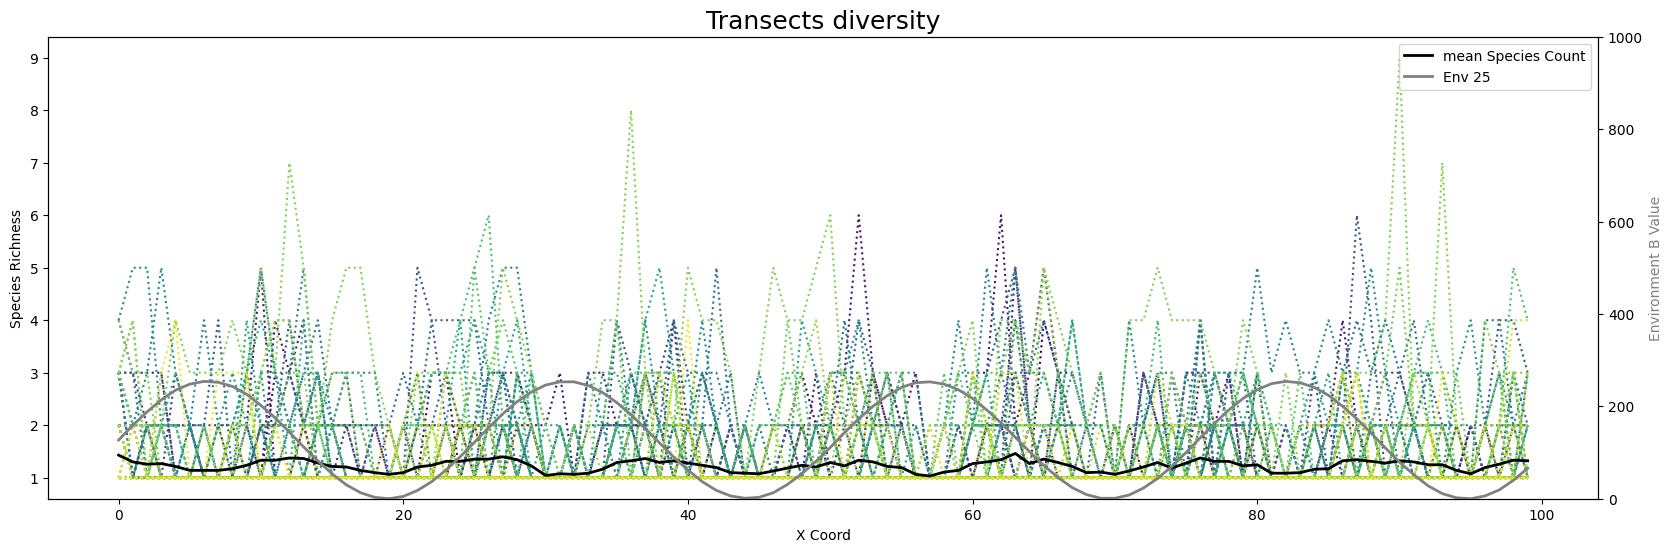

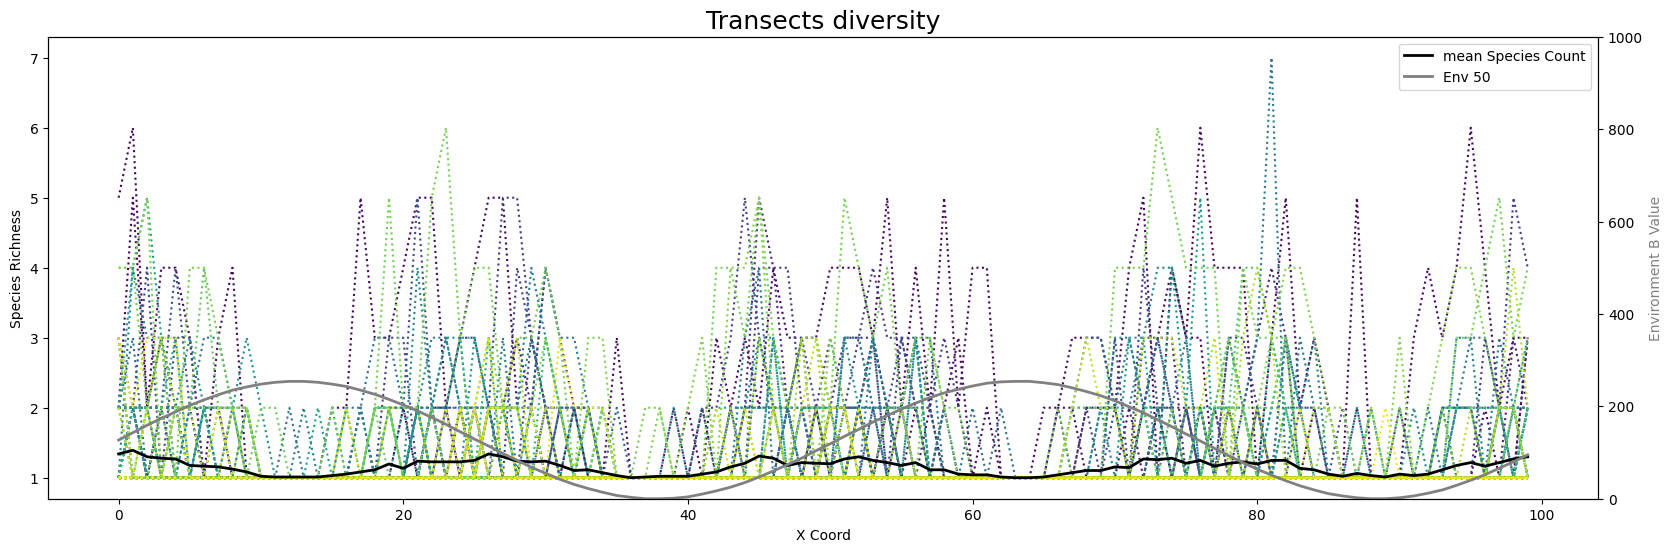

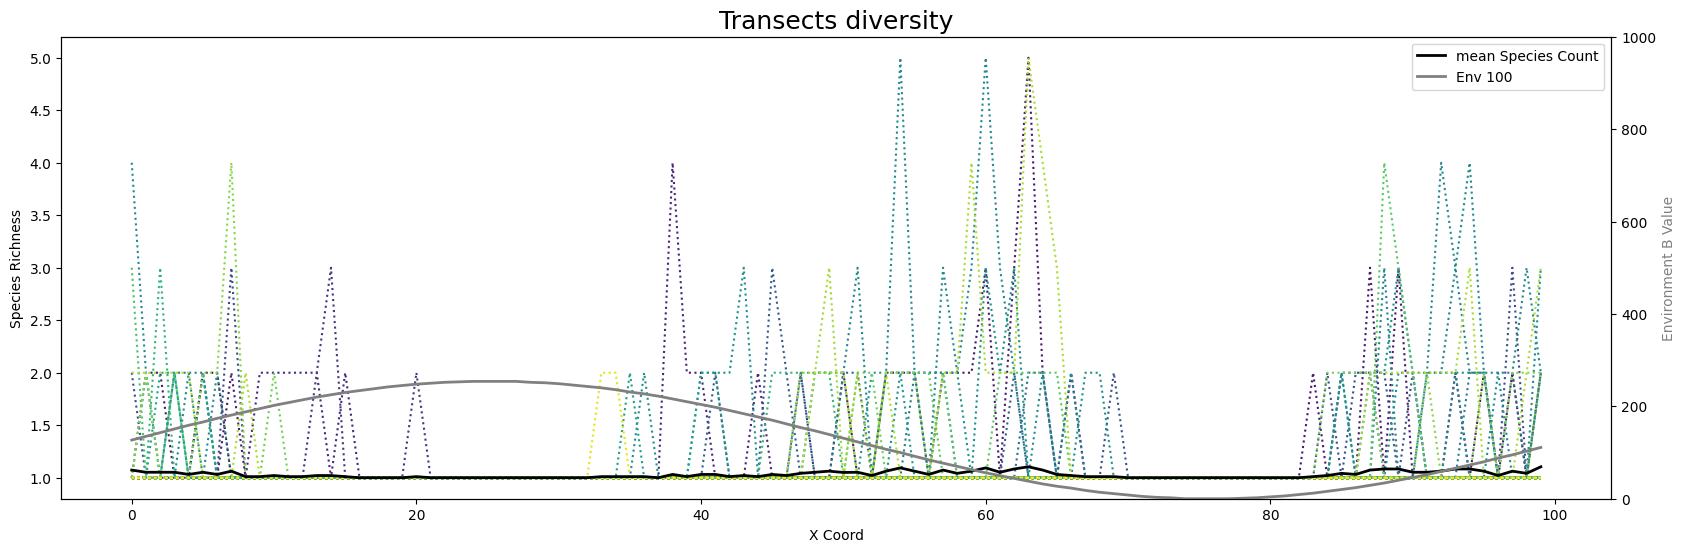

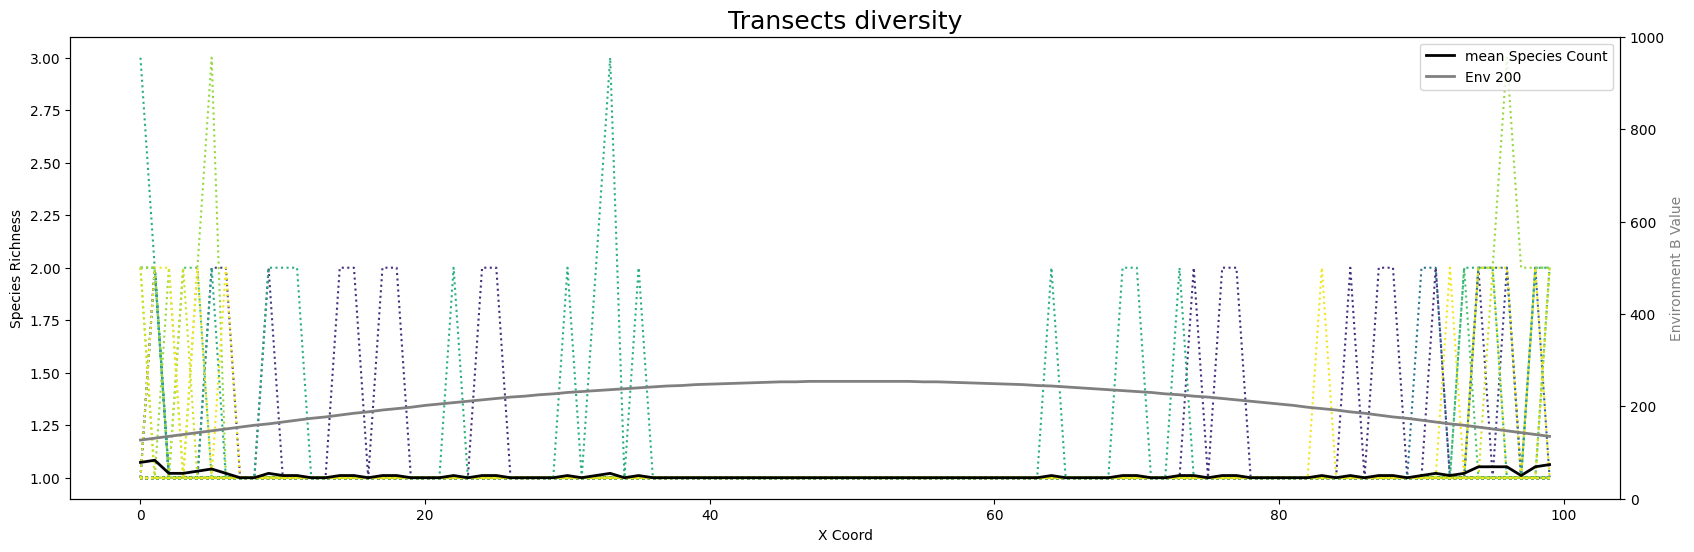

In [25]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Batch Num'] = f'sim {match.group(1)}'
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
    
    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot scatter plot and average line on the primary y-axis (left)
    scatter = sns.lineplot(data=transects, x='X coord', y='Species Richness', hue='Batch Num', palette='viridis', ax=ax1, linestyle='dotted')
    line1, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)

    # Create a secondary y-axis for the environent (right)
    ax2 = ax1.twinx()
    line2, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment', color='gray', linewidth=2)

    # Set labels and title for the plot
    ax1.set_xlabel('X Coord')
    ax1.set_ylabel('Species Richness')
    ax2.set_ylabel('Environment B Value', color='gray')
    ax2.set_ylim(0, 1000)
    #ax1.set_ylim(0, 3)
    plt.title('Transects diversity', size=18)
    scatter.get_legend().remove()

    # Create my own legend
    handles = [line1, line2]
    labels = ['mean Species Count', f'Env {folder_labels[i]}']
    plt.legend(handles=handles, labels=labels, loc='upper right')
    plt.show()





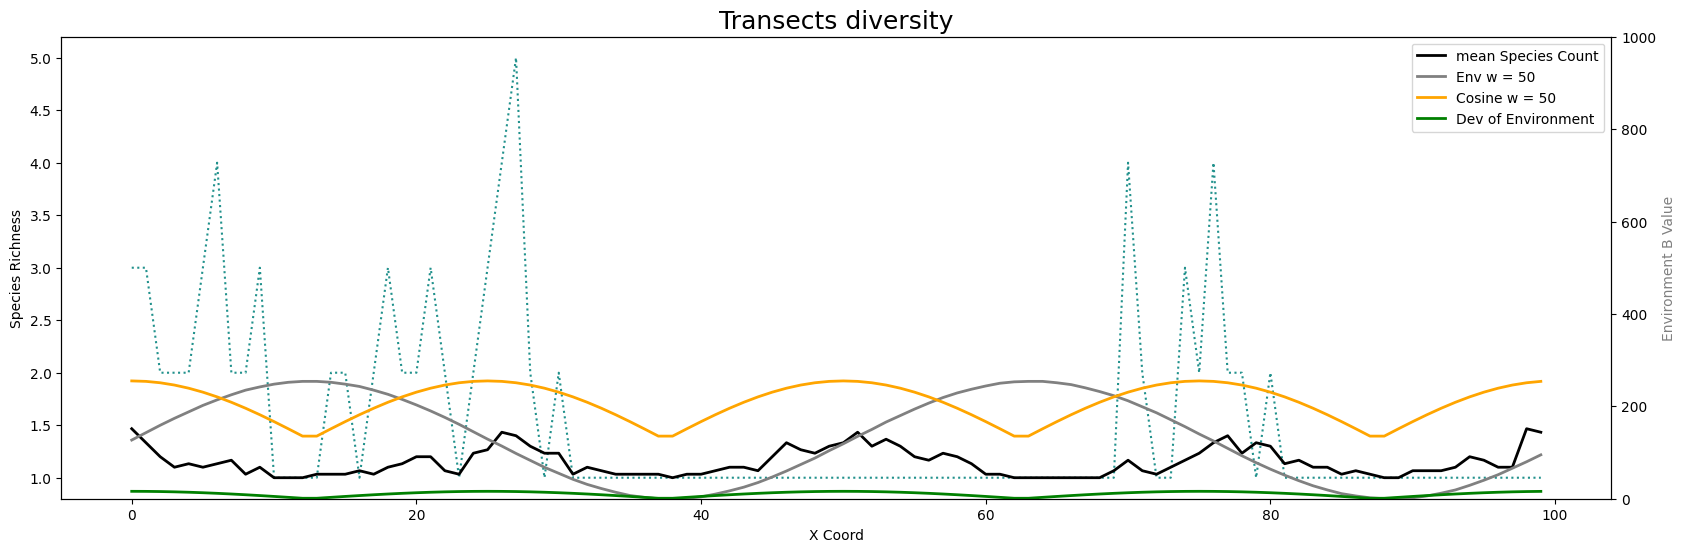

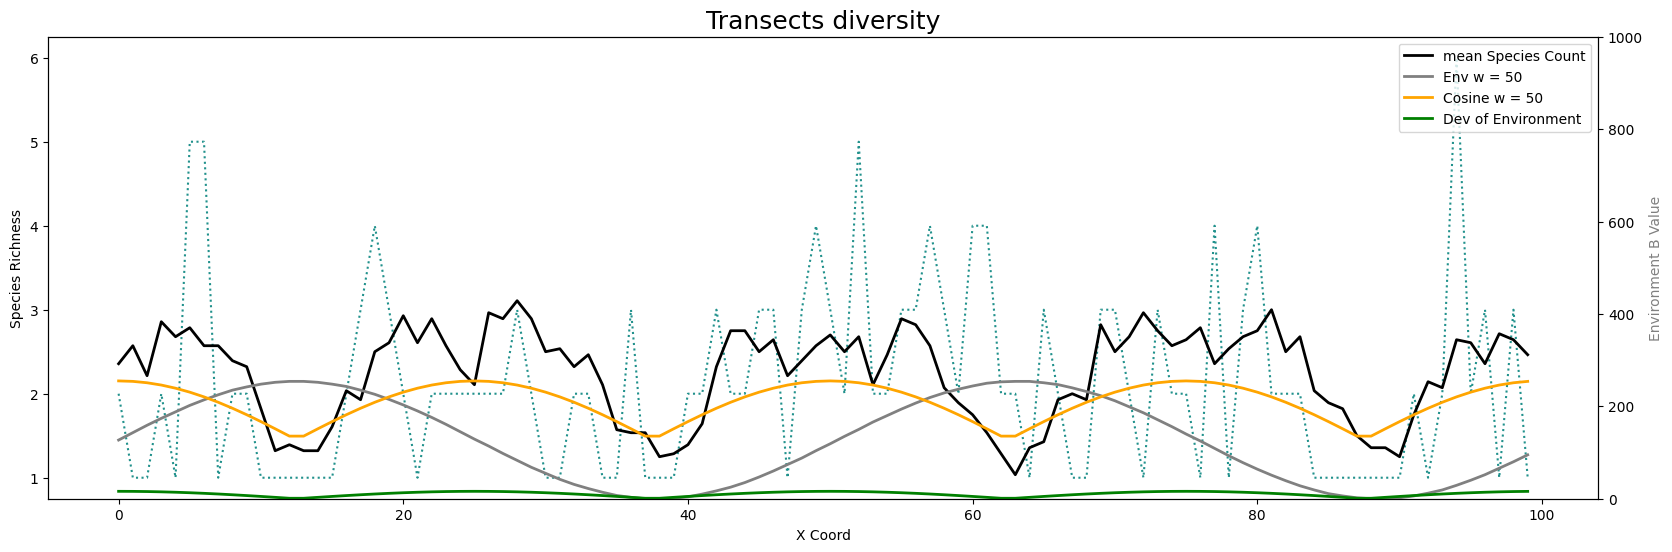

In [21]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Batch Num'] = f'sim {match.group(1)}'
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects= pd.concat([transects, species_count], ignore_index=True)

    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot scatter plot and average line on the primary y-axis (left)
    scatter = sns.lineplot(data=species_count, x='X coord', y='Species Richness', hue='Batch Num', palette='viridis', linestyle='dotted', ax=ax1)
    line1, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)

    # look if there are fucntions related to the environment function that would describe the diversity curve. 
    wavelength = folder_labels[i] # define the variable that contains the wavelength
    cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength))) # this is just a cos fun that seems to describe well the diversity trend
    devsin = (255* np.pi * abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength)))/wavelength # this is the direvative of teh environment function


    # Create a secondary y-axis for the environent (right)
    ax2 = ax1.twinx()
    line2, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment', color='gray',  linewidth=2)
    line3, = ax2.plot(colour_cell['X coord'], cosfun, label='Cosine', color='Orange',  linewidth=2)
    line4, = ax2.plot(colour_cell['X coord'], devsin, label='Dev of Env', color='green',  linewidth=2)

    # Set labels and title for the plot
    ax1.set_xlabel('X Coord')
    ax1.set_ylabel('Species Richness')
    ax2.set_ylabel('Environment B Value', color='gray')
    ax2.set_ylim(0, 1000)
    #ax1.set_ylim(0, 3)
    plt.title('Transects diversity', size=18)
    scatter.get_legend().remove()

    # Create my own legend
    handles = [line1, line2, line3, line4,]
    labels = ['mean Species Count', f'Env w = {folder_labels[i]}', f'Cosine w = {folder_labels[i]}', 'Dev of Environment']
    plt.legend(handles=handles, labels=labels, loc='upper right')
    plt.show()





In the following cell I'm trying to see if graphically tehre is a relationship between the derivative of the sin environmental function and the diversity.

It looks like the diversity might be described by a cosine function where we make absolute the argument of the cos.


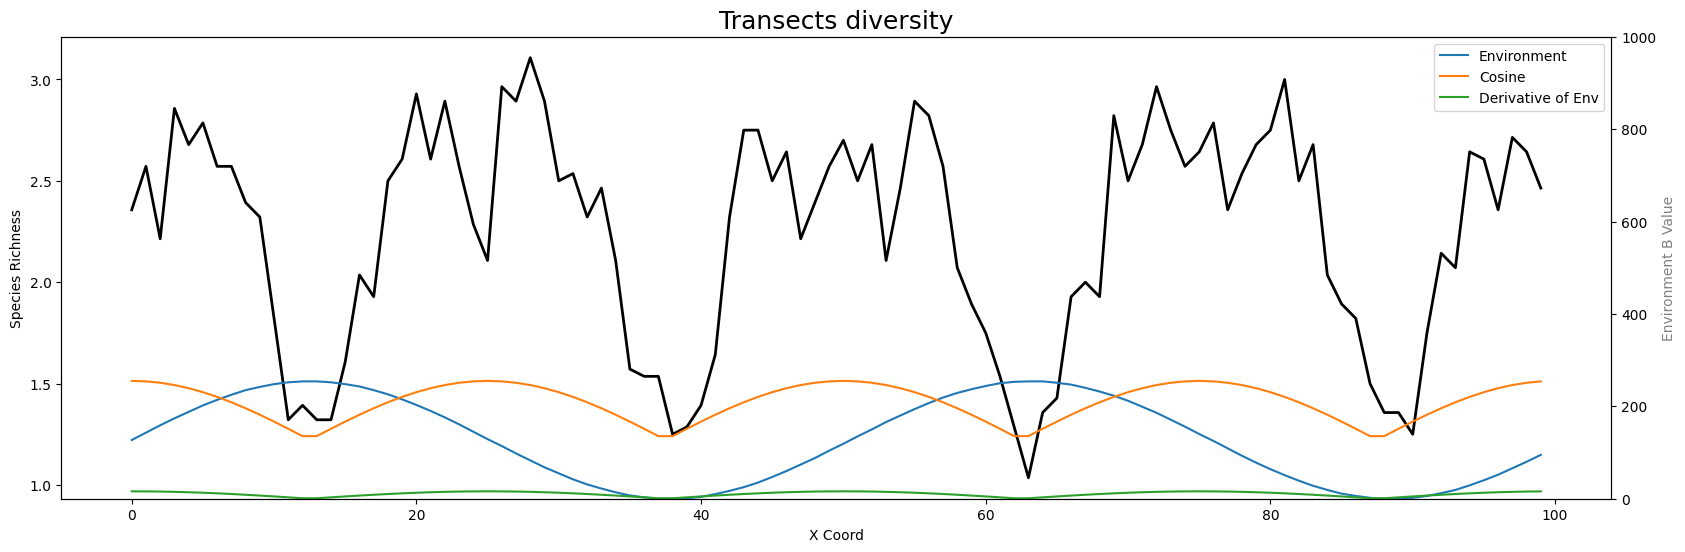

In [11]:

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot scatter plot and average line on the primary y-axis (left)
average, = ax1.plot(average_line['X coord'], average_line['Species Richness'], label='Average Line', color='black', linewidth=2)
# Create a secondary y-axis for the environent (right)
ax2 = ax1.twinx()
Environment, = ax2.plot(colour_cell['X coord'], colour_cell['environment B value'], label='Environment')

#defining functions that might describe diversity
wavelength = 50
cosfun = (255/2) * (1+ abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength)))
devsin = (255* np.pi * abs(np.cos(2 * np.pi * (colour_cell['X coord']) / wavelength)))/wavelength

#plotting
Cosine, = ax2.plot(colour_cell['X coord'], cosfun, label='Cosine')
Derivative = ax2.plot(colour_cell['X coord'], devsin, label='Derivative of Env')


# Set labels and title for the plot
ax1.set_xlabel('X Coord')
ax1.set_ylabel('Species Richness')
ax2.set_ylabel('Environment B Value', color='gray')
ax2.set_ylim(0, 1000)
#ax1.set_ylim(0, 3)
plt.title('Transects diversity', size=18)
plt.legend()
# scatter.get_legend().remove()

# # Create my own legend
# handles = [line1, line2, line3]
# labels = ['mean Species Count', f'Env w = {folder_labels[i]}', f'Cosine w = {folder_labels[i]}']
# plt.legend(handles=handles, labels=labels, loc='upper right')
plt.show()

Taking a look at the distribution of Diversity when we take a slice of the transect. How many simulations are above the mean? How many are below? what are the outliers? Is this distribution skewed as it was for the total species counts at equilibrium?

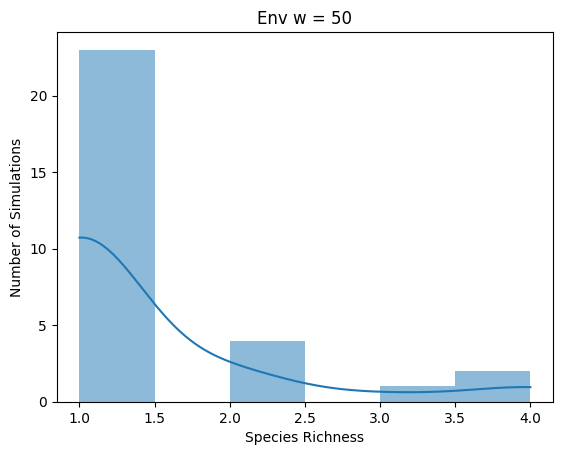

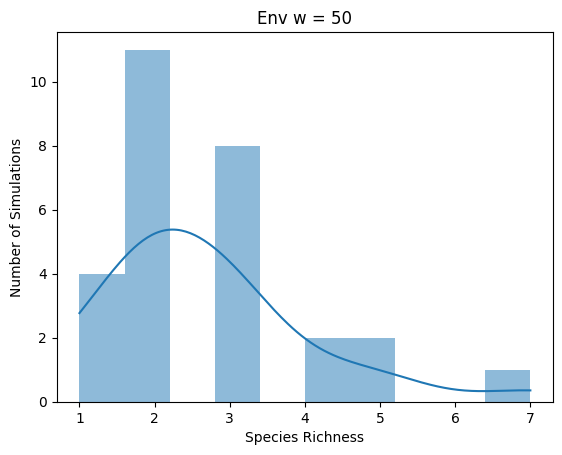

In [39]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation Num'] = match.group(1)
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            
    distribution = transects[transects['X coord'] == 49]  
    plt.figure()  # Create a new figure for each folder    
    sns.histplot(distribution['Species Richness'], kde=True, linewidth = 0)
    plt.xlabel('Species Richness')
    plt.ylabel('Number of Simulations')
    plt.title(f'Env w = {folder_labels[i]}')
            
    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()
    

In [ ]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 49 (a transect in the middle)
            df = df[df['Y coord'] == 49]
            df = df[['X coord', 'species ID', 'environment B value']]
            species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
            species_count['Simulation Num'] = match.group(1)
            species_count =species_count.rename(columns={'species ID': 'Species Richness'} )
            
            colour_cell = df[['X coord', 'environment B value']]
            colour_cell = colour_cell.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            
            transects = pd.concat([transects, species_count], ignore_index=True)
            
    distribution = transects[transects['X coord'] == 49]  
    plt.figure()  # Create a new figure for each folder    
    sns.histplot(distribution['Species Richness'], kde=True, linewidth = 0)
    plt.xlabel('Species Richness')
    plt.ylabel('Number of Simulations')
    plt.title(f'Env w = {folder_labels[i]}')
            
    # Calculate the average line
    average_line = transects.groupby('X coord')['Species Richness'].mean().reset_index()

Checking the environments and what are their values if we take an horizontal transect

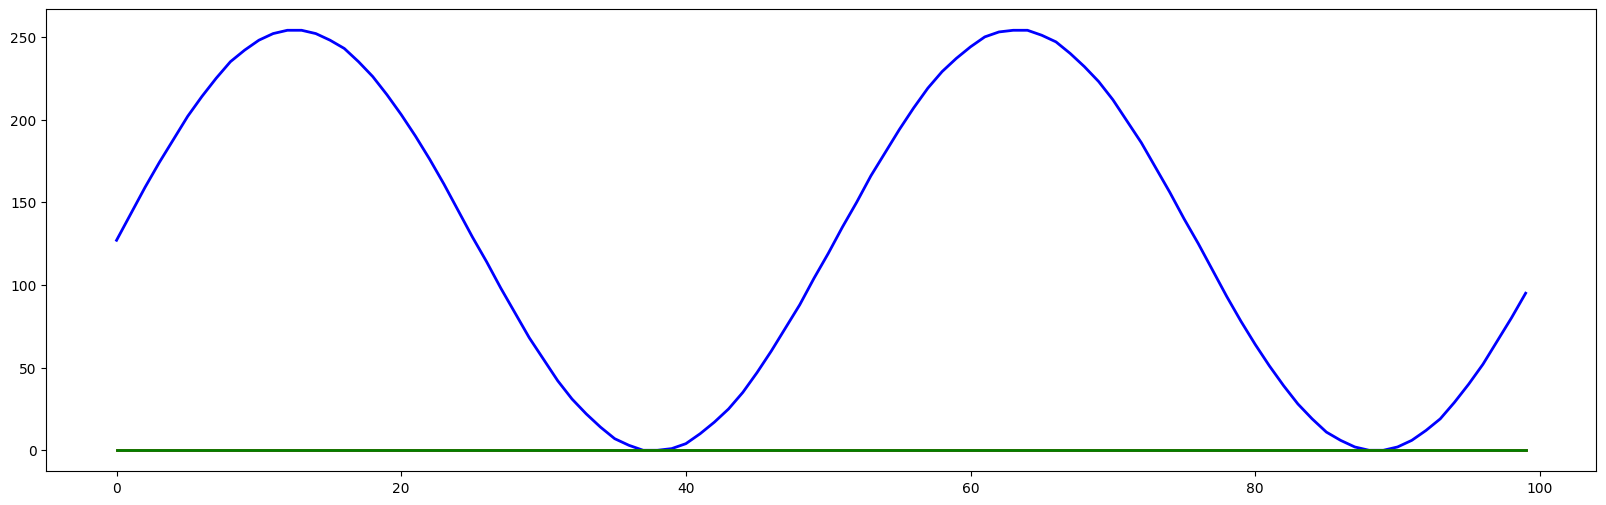

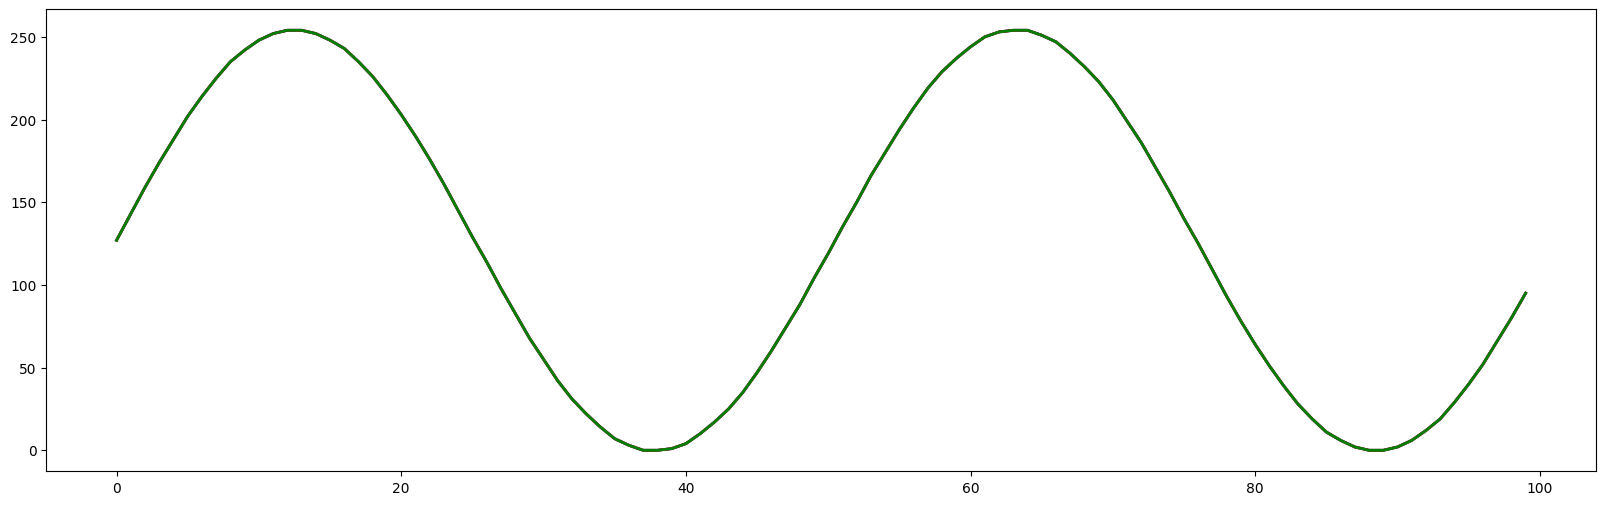

In [23]:

for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals on a transect in the middle of the picture
    # create an empty dataframe to store the transects in the current folder
    transects = pd.DataFrame(columns=['X coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            # take all the records that have y = 50 (a transect in the middle)
            df = df[df['Y coord'] == 50]
            df = df[['X coord', 'environment G value', 'environment R value', 'environment B value']]
            
            blue = df[['X coord', 'environment B value']]
            blue = blue.drop_duplicates(subset=['X coord', 'environment B value'], keep='first')
            red = df[['X coord', 'environment R value']]
            red = red.drop_duplicates(subset=['X coord', 'environment R value'], keep='first')
            green = df[['X coord', 'environment G value']]
            green = green.drop_duplicates(subset=['X coord', 'environment G value'], keep='first')

    plt.subplots(figsize=(20, 6))
    plt.plot(blue['X coord'], blue['environment B value'], label='Environment', color='Blue', linewidth=2)
    plt.plot(red['X coord'], red['environment R value'], label='Environment', color='Red', linewidth=2)
    plt.plot(green['X coord'], green['environment G value'], label='Environment', color='Green', linewidth=2)
    plt.show()





## Heatmaps of biodiversity

I map the 100x100 px, in each cell I want the number of species counts.

In [67]:
for i, folder_path in enumerate(folder_paths):
    # creating a loop that will take all of the files, all of the individuals
    # create an empty dataframe to store the transects in the current folder
    heatmap = pd.DataFrame(columns=['X coord', 'Y coord', 'Species Richness', 'Batch Num'])
            
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            # import file 
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            df = df[['X coord', 'Y coord', 'species ID']]
            # calculate species richness
            sc_matrix = df.groupby(['Y coord', 'X coord'])['species ID'].nunique().reset_index()
            #sc_matrix['Batch Num'] = f'sim {match.group(1)}'
            sc_matrix =sc_matrix.rename(columns={'species ID': 'Species Richness'} )
            
            heatmap = pd.concat([heatmap, sc_matrix], ignore_index=True)


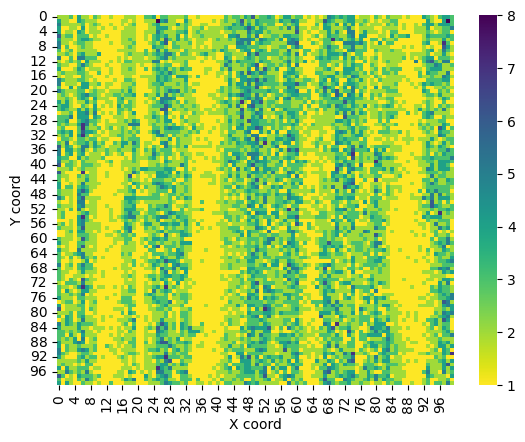

In [75]:
pivot = sc_matrix.pivot(index='Y coord', columns='X coord', values='Species Richness')
sns.heatmap(pivot, cmap='viridis_r')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

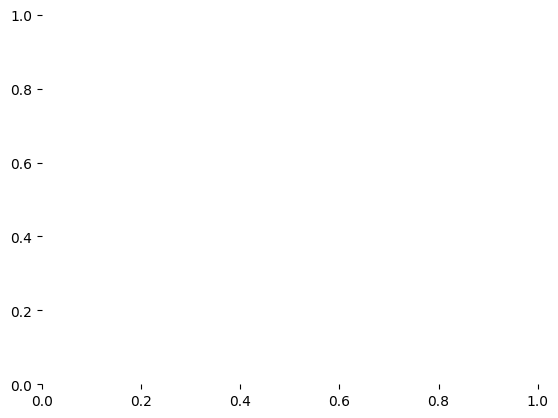

In [77]:
pivot_mean = heatmap.pivot_table(index='Y coord', columns='X coord', values='Species Richness', aggfunc='mean')
sns.heatmap(pivot_mean, cmap='viridis_r')
plt.show()